In [3]:
# Import all dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [7]:
from citipy import citipy

In [8]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

637

In [9]:
import requests
from config import weather_api_key

In [10]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62368eea2f73da9644160efa33533653


In [11]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [12]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i > 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

# Loop through all the cities in our list.
for i in range(len(cities)):
    
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

Beginning Data Retrieval     
-------------------
Processing Record 1 of Set 1 | aklavik
Processing Record 2 of Set 1 | tabiauea
City not found. Skipping...
Processing Record 3 of Set 1 | mataura
Processing Record 4 of Set 1 | a coruna
Processing Record 5 of Set 1 | mahon
Processing Record 6 of Set 1 | ixtapa
Processing Record 7 of Set 1 | new norfolk
Processing Record 8 of Set 1 | ribeira grande
Processing Record 9 of Set 1 | bahia de caraquez
Processing Record 10 of Set 1 | carnarvon
Processing Record 11 of Set 1 | cabo san lucas
Processing Record 12 of Set 1 | bundibugyo
Processing Record 13 of Set 1 | rikitea
Processing Record 14 of Set 1 | bulungu
Processing Record 15 of Set 1 | plettenberg bay
Processing Record 16 of Set 1 | busselton
Processing Record 17 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 18 of Set 1 | sinnamary
Processing Record 19 of Set 1 | vaini
Processing Record 20 of Set 1 | mar del plata
Processing Record 21 of Set 1 | tumannyy
City 

Processing Record 34 of Set 3 | avera
Processing Record 35 of Set 3 | cherskiy
Processing Record 36 of Set 3 | ituni
City not found. Skipping...
Processing Record 37 of Set 3 | bjornevatn
Processing Record 38 of Set 3 | bouca
Processing Record 39 of Set 3 | bandarbeyla
Processing Record 40 of Set 3 | homer
Processing Record 41 of Set 3 | deniliquin
Processing Record 42 of Set 3 | ostrovnoy
Processing Record 43 of Set 3 | xuanhua
Processing Record 44 of Set 3 | nisia floresta
Processing Record 45 of Set 3 | severo-kurilsk
Processing Record 46 of Set 3 | fort nelson
Processing Record 47 of Set 3 | palu
Processing Record 48 of Set 3 | sola
Processing Record 49 of Set 3 | rantepao
Processing Record 50 of Set 3 | tilichiki
Processing Record 1 of Set 4 | san carlos de bariloche
Processing Record 2 of Set 4 | tomatlan
Processing Record 3 of Set 4 | lasa
Processing Record 4 of Set 4 | la baule-escoublac
Processing Record 5 of Set 4 | tiksi
Processing Record 6 of Set 4 | namibe
Processing Recor

Processing Record 25 of Set 7 | kieta
Processing Record 26 of Set 7 | solovetskiy
City not found. Skipping...
Processing Record 27 of Set 7 | inhambane
Processing Record 28 of Set 7 | ayni
Processing Record 29 of Set 7 | kjollefjord
Processing Record 30 of Set 7 | tome-acu
City not found. Skipping...
Processing Record 31 of Set 7 | gerede
Processing Record 32 of Set 7 | marzuq
Processing Record 33 of Set 7 | rosetta
Processing Record 34 of Set 7 | lolua
City not found. Skipping...
Processing Record 35 of Set 7 | teguldet
Processing Record 36 of Set 7 | lorengau
Processing Record 37 of Set 7 | hihifo
City not found. Skipping...
Processing Record 38 of Set 7 | matagami
Processing Record 39 of Set 7 | kryve ozero
Processing Record 40 of Set 7 | sakakah
Processing Record 41 of Set 7 | chimoio
Processing Record 42 of Set 7 | nouadhibou
Processing Record 43 of Set 7 | kiunga
Processing Record 44 of Set 7 | yanan
City not found. Skipping...
Processing Record 45 of Set 7 | wadi musa
Processing

Processing Record 6 of Set 11 | ialibu
Processing Record 7 of Set 11 | paamiut
Processing Record 8 of Set 11 | nova olimpia
Processing Record 9 of Set 11 | pangnirtung
Processing Record 10 of Set 11 | novo aripuana
Processing Record 11 of Set 11 | paita
Processing Record 12 of Set 11 | aleksandrovskoye
Processing Record 13 of Set 11 | norfolk
Processing Record 14 of Set 11 | sibolga
Processing Record 15 of Set 11 | kyaikkami
Processing Record 16 of Set 11 | luena
Processing Record 17 of Set 11 | tocache
Processing Record 18 of Set 11 | salinopolis
Processing Record 19 of Set 11 | marcona
City not found. Skipping...
Processing Record 20 of Set 11 | morant bay
Processing Record 21 of Set 11 | lucea
Processing Record 22 of Set 11 | bonavista
Processing Record 23 of Set 11 | salvador
Processing Record 24 of Set 11 | camacupa
Processing Record 25 of Set 11 | bahile
Processing Record 26 of Set 11 | port blair
Processing Record 27 of Set 11 | velasco ibarra
Processing Record 28 of Set 11 | co

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Aklavik,68.2191,-135.0107,32.00,86,93,3.44,CA,2021-05-14 07:39:30
1,Mataura,-46.1927,168.8643,46.99,81,100,5.01,NZ,2021-05-14 07:39:30
2,A Coruna,43.3713,-8.3960,52.00,100,20,5.75,ES,2021-05-14 07:39:31
3,Mahon,39.8885,4.2658,62.60,82,75,14.97,ES,2021-05-14 07:39:31
4,Ixtapa,20.7000,-105.2000,80.01,72,0,1.30,MX,2021-05-14 07:39:32
5,New Norfolk,-42.7826,147.0587,46.00,77,99,1.99,AU,2021-05-14 07:39:32
6,Ribeira Grande,38.5167,-28.7000,64.40,100,75,13.80,PT,2021-05-14 07:39:33
7,Bahia De Caraquez,-0.6000,-80.4167,73.40,83,90,6.91,EC,2021-05-14 07:39:33
8,Carnarvon,-24.8667,113.6333,91.40,31,1,9.22,AU,2021-05-14 07:39:33
9,Cabo San Lucas,22.8909,-109.9124,84.00,37,100,11.88,MX,2021-05-14 07:39:34


In [14]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [15]:
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Aklavik,CA,2021-05-14 07:39:30,68.2191,-135.0107,32.00,86,93,3.44
1,Mataura,NZ,2021-05-14 07:39:30,-46.1927,168.8643,46.99,81,100,5.01
2,A Coruna,ES,2021-05-14 07:39:31,43.3713,-8.3960,52.00,100,20,5.75
3,Mahon,ES,2021-05-14 07:39:31,39.8885,4.2658,62.60,82,75,14.97
4,Ixtapa,MX,2021-05-14 07:39:32,20.7000,-105.2000,80.01,72,0,1.30
...,...,...,...,...,...,...,...,...,...
565,Mezen,RU,2021-05-14 07:43:10,65.8522,44.2400,69.40,42,77,7.83
566,Willowmore,ZA,2021-05-14 07:43:10,-33.2926,23.4895,66.74,31,0,5.14
567,Maniitsoq,GL,2021-05-14 07:43:10,65.4167,-52.9000,32.88,68,79,5.73
568,Dhangadhi,NP,2021-05-14 07:43:11,28.7079,80.5961,94.86,27,2,6.02


In [17]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [18]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [19]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1620980822.8894856

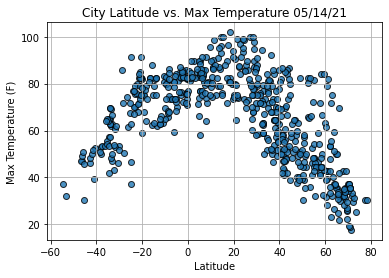

In [20]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

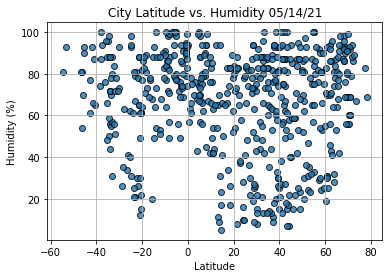

In [21]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

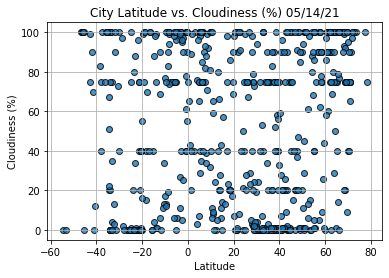

In [22]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

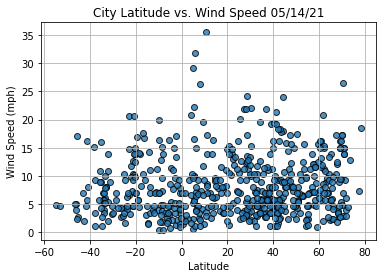

In [23]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()